In [44]:
from moonlight import *
import numpy as np
import matplotlib.pyplot as plt

In [117]:
import gillespy2

def create_dimerization(parameter_values=None):
    # First call the gillespy2.Model initializer.
    model = gillespy2.Model(name='Dimerization')

    # Define parameters for the rates of creation and dissociation.
    k_c = gillespy2.Parameter(name='k_c', expression=0.005)
    k_d = gillespy2.Parameter(name='k_d', expression=0.07)
    model.add_parameter([k_c, k_d])

    # Define variables for the molecular species representing M and D.
    m = gillespy2.Species(name='monomer', initial_value=50)
    d = gillespy2.Species(name='dimer',   initial_value=0)
    model.add_species([m, d])

    # The list of reactants and products for a Reaction object are each a
    # Python dictionary in which the dictionary keys are Species objects
    # and the values are stoichiometries of the species in the reaction.
    r_c = gillespy2.Reaction(name="r_creation", rate=k_c, reactants={m:2}, products={d:1})
    r_d = gillespy2.Reaction(name="r_dissociation", rate=k_d, reactants={d:1}, products={m:2})
    model.add_reaction([r_c, r_d])

    # Set the timespan for the simulation.
    tspan = gillespy2.TimeSpan.linspace(t=100, num_points=101)
    model.timespan(tspan)
    return model

def create_sir(parameter_values=None):
    # First call the gillespy2.Model initializer.
    model = gillespy2.Model(name='SIR')

    # Define parameters for the rates of creation and dissociation.
    k_s = gillespy2.Parameter(name='k_s', expression=0.002)
    k_i = gillespy2.Parameter(name='k_i', expression=0.05)
    k_r = gillespy2.Parameter(name='k_r', expression=0.02)

    model.add_parameter([k_s, k_i, k_r])

    # Define variables for the molecular species representing M and D.
    s = gillespy2.Species(name='susceptible', initial_value=500)
    i = gillespy2.Species(name='infectious',   initial_value=50)
    r = gillespy2.Species(name='removed',   initial_value=0)
    model.add_species([s, i, r])

    # The list of reactants and products for a Reaction object are each a
    # Python dictionary in which the dictionary keys are Species objects
    # and the values are stoichiometries of the species in the reaction.
    r_s = gillespy2.Reaction(name="r_s", rate=k_s, reactants={s:1,i:1}, products={i:2})
    r_i = gillespy2.Reaction(name="r_i", rate=k_i, reactants={i:1}, products={r:1})
    r_r = gillespy2.Reaction(name="r_r", rate=k_r, reactants={r:1}, products={s:1})
    model.add_reaction([r_s, r_i, r_r])

    # Set the timespan for the simulation.
    tspan = gillespy2.TimeSpan.linspace(t=500, num_points=101)
    model.timespan(tspan)
    return model

In [121]:
model = create_dimerization()
results = model.run(number_of_trajectories=10)

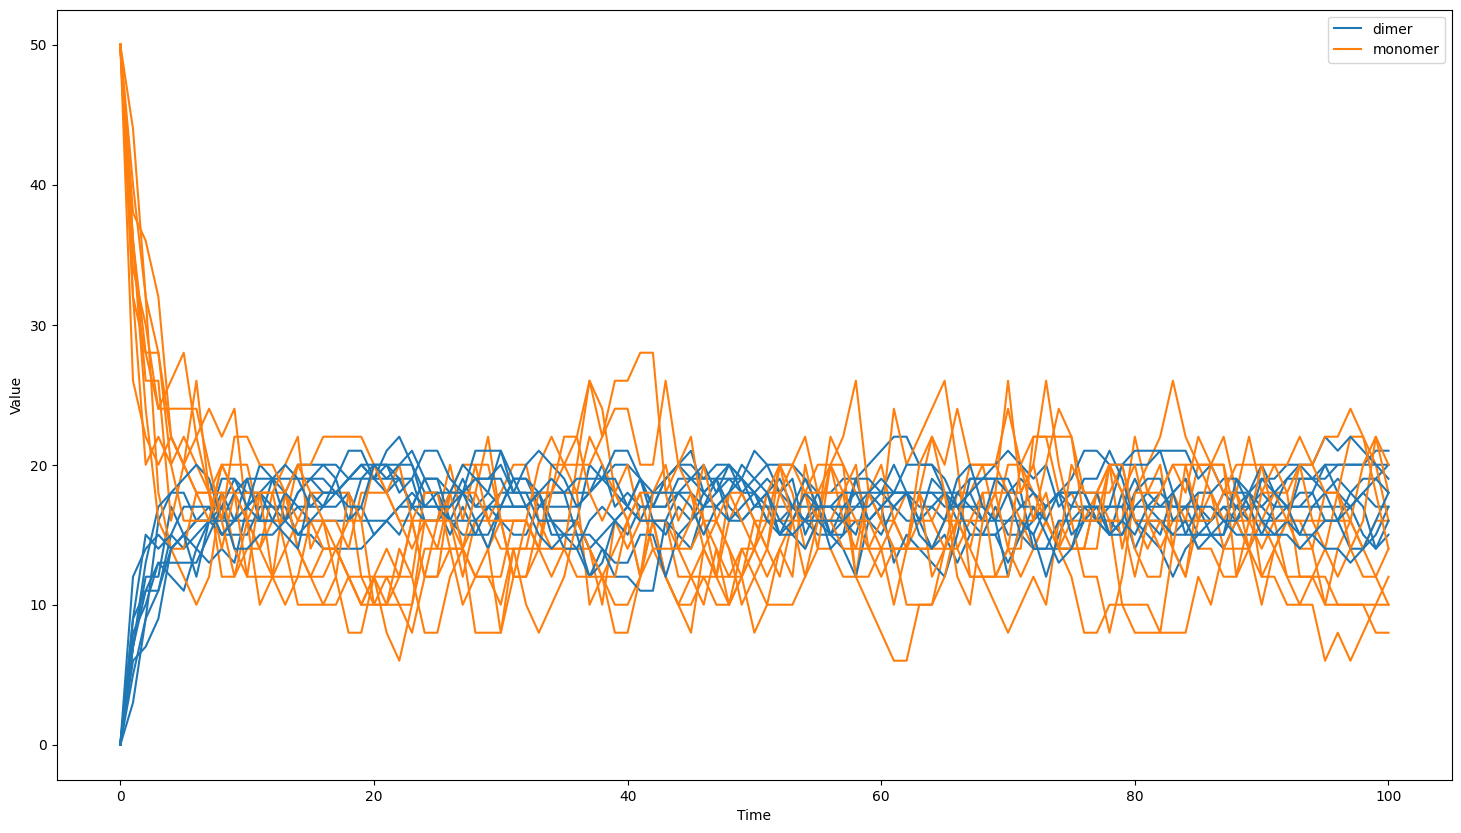

In [122]:
results.plot()


In [30]:
results[0]

{'time': array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.]), 'dimer': array([ 0., 29., 33., 35., 36., 37., 40., 40., 39., 42., 44., 40., 40.,
       36., 35., 35., 38., 38., 39., 40., 41., 40., 41., 41., 42., 41.,
       38., 38., 40., 41., 41., 42., 39., 35., 35., 38., 42., 38., 38.,
       39., 39., 40., 43., 41., 35., 34., 36., 39., 39., 38., 37., 40.,
       40., 38.,

In [ ]:
script = """
signal { real monomer; real dimer;}
domain minmax; 
formula future = globally [40, 80](dimer > monomer);
"""

moonlightScript = ScriptLoader.loadFromText(script)

monitor = moonlightScript.getMonitor("future")
result =monitor.monitor(results[0]["time"].tolist(),list(zip(results[1]["dimer"],results[0]["monomer"])))


In [49]:
result    

[[0.0, -25.0], [1.0, -24.0], [20.0, -24.0]]

In [42]:
import numpy as np 
results[0]["time"]
list(zip(results[0]["dimer"],results[0]["monomer"]))

[(0.0, 100.0),
 (26.0, 48.0),
 (33.0, 34.0),
 (38.0, 24.0),
 (39.0, 22.0),
 (39.0, 22.0),
 (37.0, 26.0),
 (39.0, 22.0),
 (39.0, 22.0),
 (38.0, 24.0),
 (36.0, 28.0),
 (36.0, 28.0),
 (39.0, 22.0),
 (41.0, 18.0),
 (40.0, 20.0),
 (41.0, 18.0),
 (41.0, 18.0),
 (43.0, 14.0),
 (36.0, 28.0),
 (40.0, 20.0),
 (40.0, 20.0),
 (41.0, 18.0),
 (39.0, 22.0),
 (39.0, 22.0),
 (37.0, 26.0),
 (39.0, 22.0),
 (38.0, 24.0),
 (39.0, 22.0),
 (37.0, 26.0),
 (37.0, 26.0),
 (37.0, 26.0),
 (40.0, 20.0),
 (41.0, 18.0),
 (42.0, 16.0),
 (41.0, 18.0),
 (41.0, 18.0),
 (40.0, 20.0),
 (39.0, 22.0),
 (39.0, 22.0),
 (37.0, 26.0),
 (42.0, 16.0),
 (41.0, 18.0),
 (40.0, 20.0),
 (40.0, 20.0),
 (41.0, 18.0),
 (40.0, 20.0),
 (41.0, 18.0),
 (38.0, 24.0),
 (38.0, 24.0),
 (37.0, 26.0),
 (38.0, 24.0),
 (37.0, 26.0),
 (39.0, 22.0),
 (38.0, 24.0),
 (39.0, 22.0),
 (36.0, 28.0),
 (39.0, 22.0),
 (38.0, 24.0),
 (37.0, 26.0),
 (40.0, 20.0),
 (38.0, 24.0),
 (37.0, 26.0),
 (40.0, 20.0),
 (40.0, 20.0),
 (42.0, 16.0),
 (37.0, 26.0),
 (38.0, 24